# Lbrerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import product
from fractions import Fraction
from IPython.display import Markdown
def printmd(text):
    display(Markdown(text))
from math import comb
import random
import math
from random import randint
import matplotlib.ticker as ticker

# 1. Espacio de probabilidad

## 1.1 Clásica

Históricamente, esta forma de calcular probabilidades es una de las primeras en utilizarse; se aplicó con
 bastante éxito en problemas de juegos de azar y ayudó a sentar las bases para construir la teoría matemática.
 Su definición es elemental y suaplicación está restringida a situaciones cuando se satisfacen ciertas condiciones en el
 experimento aleatorio

Definiciónn Sea Aun subconjunto de un espacio muestral Ω de cardinalidad finita. Se define la probabilidad clásica del evento A como
 el cociente:

$$ \mathbb{P} (A) = \frac{\#A}{\#\Omega} $$

 endonde el símbolo #A denota la cardinalidad o número de elementos del conjunto A

### Ejemplos

Sea el experimento de lanzar una moneda 3 veces, de manera independiente (es decir, el $i$-ésimo lanzamiento no me afecta al $i+1$ lanzamiento). El espacio muestral de este experimento es:

$$ \Omega = \{A,S\} \times \{A,S\} \times \{A,S\} = \{A,S\}^3 $$
y tenemos que $\#\Omega = 2^3$.

Sean los eventos:
* $A$: todos los resultados son águila
* $S$: todos los resultados son soles
* $E$: Por lo menos un resultado es sol

 ¿Cómo se relaciona con conjuntos?
En este enfoque, los eventos son conjuntos, y se pueden operar así:

Unión: 
$A  \cup B $: "ocurre A o B"

Intersección: 
$A  \cap B $: "ocurre A y B"

Complemento: 
$A  \subset $: "no ocurre A"

Diferencia: 
$A  - B $: "ocurre A pero no B"

In [2]:
#Ejemplo Espacio muestral
omega = {1, 2, 3, 4, 5, 6}

# Conjuntos de eventos
A = {2, 4, 6}
B = {4, 5, 6}

# Operaciones con conjuntos
union = A.union(B)
interseccion = A.intersection(B)
complemento_A = omega - A

# Probabilidades clásicas
P_A = len(A) / len(omega)
P_union = len(union) / len(omega)
P_interseccion = len(interseccion) / len(omega)
P_complemento_A = len(complemento_A) / len(omega)

# Resultados
print("Espacio muestral (Ω):", omega)
print("Evento A:", A)
print("Evento B:", B)
print("A ∪ B:", union)
print("A ∩ B:", interseccion)
print("Complemento de A:", complemento_A)
print()
print(f"P(A) = {P_A:.2f}")
print(f"P(A ∪ B) = {P_union:.2f}")
print(f"P(A ∩ B) = {P_interseccion:.2f}")
print(f"P(Aᶜ) = {P_complemento_A:.2f}")


Espacio muestral (Ω): {1, 2, 3, 4, 5, 6}
Evento A: {2, 4, 6}
Evento B: {4, 5, 6}
A ∪ B: {2, 4, 5, 6}
A ∩ B: {4, 6}
Complemento de A: {1, 3, 5}

P(A) = 0.50
P(A ∪ B) = 0.67
P(A ∩ B) = 0.33
P(Aᶜ) = 0.50


  
Calcular las probabilidades de estos eventos:

**Solución** Vamos a descomponer mi conjunto $A$ de la siguiente manera:
$$A = A_1 \cap A_2 \cap A_3 $$
donde $A_i$: caé águila en el $i$-ésimo resultado.


In [3]:
# Vamos a crear el espacio muestral
Omega = set( product({"A","S"},repeat=3 ))
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [4]:
len(Omega) # cardinalidad de Omega

8

In [5]:
# Vamos a crear el evento A_1
A_1 = { om for om in Omega if om[0]=="A"} # la primera coordenada es águila
A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [6]:
# Vamos a crear el evento A_2
A_2 = { om for om in Omega if om[1]=="A"} # la segunda coordenada es águila
A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [7]:
# Vamos a crear el evento A_3
A_3 = { om for om in Omega if om[2]=="A"} # la tercera coordenada es águila
A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

In [8]:
# Vamos a crear el evento A 
A = A_1.intersection(A_2.intersection(A_3))
A

{('A', 'A', 'A')}

In [9]:
# Vamos a calcular la probabilidad de A
P_A = len(A) / len(Omega)
P_A

0.125

In [10]:
# Mostarndo el resultado en fracción

def p(E,Omega):
    p = Fraction(len(E),len(Omega))
    return p

In [11]:
prob = p(A,Omega)
prob

Fraction(1, 8)

 Una urna contiene 5 bolas rojas y 3 bolas azules. Si se extrae una bola al azar, ¿cuál es la probabilidad de que sea roja?

In [12]:
# Definimos los datos del problema
bolas_rojas = 7
bolas_azules = 4
total_bolas = bolas_rojas + bolas_azules

# Casos favorables / casos posibles
probabilidad_roja = bolas_rojas / total_bolas


print(f"La probabilidad de sacar una bola roja es: {probabilidad_roja:.2f}")


La probabilidad de sacar una bola roja es: 0.64


De un grupo de 10 estudiantes (6 hombres y 4 mujeres), se elige un comité de 3 personas al azar. ¿Cuál es la probabilidad de que el comité esté formado solo por mujeres?

In [13]:
# Total de personas
hombres = 6
mujeres = 4
total = hombres + mujeres

# Elegir 3 personas del grupo
total_formas = comb(total, 3)

# Elegir 3 mujeres de las 4 disponibles
casos_favorables = comb(mujeres, 3)

# Probabilidad 
probabilidad = casos_favorables / total_formas

print(f"La probabilidad de que el comité esté formado solo por mujeres es: {probabilidad:.4f}")


La probabilidad de que el comité esté formado solo por mujeres es: 0.0333


### Ejercicio

1.- Todos los resultados son águila

In [14]:
# Se crea el evento A1
# La primera coordenada es águila
A_1 = {om for om in Omega if om[0] == 'A'}
A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [15]:
# Se crea el evento A2
# La segunda coordenada es águila
A_2 = {om for om in Omega if om[1] == 'A'}
A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [16]:
# Se crea el evento A3
# La tercera coordenada es águila
A_3 = {om for om in Omega if om[2] == 'A'}
A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

In [17]:
# Creando el evento A
A = A_1.intersection(A_2.intersection(A_3))
A

{('A', 'A', 'A')}

In [18]:
# Calculando la probabilidad de A
P_A = len(A) / len(Omega)

printmd(f'$$P_A = \\frac{{{len(A)}}}{{{len(Omega)}}} = {{{P_A}}}$$')

$$P_A = \frac{1}{8} = {0.125}$$

2.- Todos los resultados son sol

In [19]:
# Se crea el evento S1
# La primera coordenada es sol
S_1 = {om for om in Omega if om[0] == 'S'}
S_1

{('S', 'A', 'A'), ('S', 'A', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [20]:
# Se crea el evento S2
# La segunda coordenada es sol
S_2 = {om for om in Omega if om[1] == 'S'}
S_2

{('A', 'S', 'A'), ('A', 'S', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [21]:
# Se crea el evento S3
# La tercera coordenada es águila
S_3 = {om for om in Omega if om[2] == 'S'}
S_3

{('A', 'A', 'S'), ('A', 'S', 'S'), ('S', 'A', 'S'), ('S', 'S', 'S')}

In [22]:
# Creando el evento S
S = S_1.intersection(S_2.intersection(S_3))
S

{('S', 'S', 'S')}

In [23]:
# Calculando la probabilidad de A
P_S = len(S) / len(Omega)

printmd(f'$$P_S = \\frac{{{len(S)}}}{{{len(Omega)}}} = {{{P_S}}}$$')

$$P_S = \frac{1}{8} = {0.125}$$

3.- Inciso c. Al menos un resultado es sol

In [24]:
# Se crea el evento E
E = {om for om in Omega if 'S' in om}
E

{('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [25]:
P_E = len(E) / len(Omega)

printmd(f'$$P_S = \\frac{{{len(E)}}}{{{len(Omega)}}} = {{{P_E}}}$$')

$$P_S = \frac{7}{8} = {0.875}$$

 A esta forma de definir la probabilidad también se le conoce con el nombre de probabilidad de Laplace, en honor al
astrónomo y matemático francés Pierre-Simon Laplace, quien estableció de una manera sistemática y rigurosa los principios
y propiedades de esta forma de calcular probabilidades.

## 1.2 Condicional

Definimos la probabilidad de que ocurra un evento $A$ sabiendo que ocurre el evento $B$, 
$$ \mathbb{P}(A \mid B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)} = \frac{\# A\cap B}{\#B} $$
donde $\mathbb{P}(B)>0$. 

El término $ \mathbb{P}(A \mid B) $ se lee “probabilidad de A dado B” y es claro, a partir de la definición, que es necesaria la condición $ \
\mathbb{P}(B) > 0\ $ para que el cociente esté bien definido. No existe una definición establecida para $ \mathbb{P}(A \mid B) $ cuando $ \
\mathbb{P}(B) \ $. En la expresión de arriba, el evento B representa un evento que ha ocurrido, y la probabilidad condicional $ \mathbb{P}(A \mid B) $ es la probabilidad de A modificada con la información adicional de que B ha ocurrido

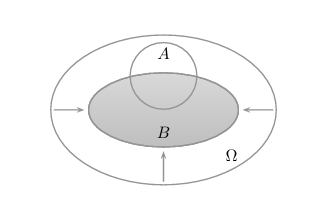


 Así, uno puede imaginar que el espacio muestral Ω del experimento aleatorio se ha reducido al evento B de tal forma que todo lo que se encuentre fuera de este evento tiene probabilidad condicional cero.

### Ejemplos

Quiero calcular la probabilidad condicional de los siguientes eventos:
* El primer lanzamiento es águila
* Dos de los resultados son águila 

In [26]:
def prob_cond(E,F):
    return len(E & F) / len(F)

In [27]:
# El primer lanzamiento es águila
B = { om for om in Omega if om[0]=="A"} # el primer lanzamiento es águila
B

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [28]:
C = { om for om in Omega if om.count("A")==2}
C

{('A', 'A', 'S'), ('A', 'S', 'A'), ('S', 'A', 'A')}

In [29]:
def prob(E): 
    return len(E) / len(Omega)

In [30]:
prob(B)

0.5

In [31]:
prob(C)

0.375

In [32]:
prob_cond(B,C)

0.6666666666666666

### Ejercicio

En una empresa, el 70% de los empleados saben inglés. De los que saben inglés, el 60% también saben francés. ¿Cuál es la probabilidad de que un empleado sepa francés sabiendo que sabe inglés?

In [33]:
# Datos del problema
p_ingles = 0.70                # P(Inglés)
p_frances_dado_ingles = 0.60  # P(Francés | Inglés)

# Probabilidad condicional ya está dada en el enunciado
# Pero podemos usar la fórmula: P(A ∩ B) = P(B | A) * P(A)
p_ingles_y_frances = p_frances_dado_ingles * p_ingles

# También podríamos calcular P(Francés | Inglés) con la fórmula inversa
# p_frances_dado_ingles = p_ingles_y_frances / p_ingles

print(f"La probabilidad de que un empleado sepa francés sabiendo que sabe inglés es: {p_frances_dado_ingles:.2f}")


La probabilidad de que un empleado sepa francés sabiendo que sabe inglés es: 0.60


En una fábrica, el 2% de los productos son defectuosos. Un test de control de calidad detecta productos defectuosos con un 95% de precisión (es decir, si el producto está defectuoso, lo detecta el 95% de las veces). Sin embargo, también da un falso positivo el 1% de las veces (detecta como defectuoso un producto que en realidad no lo está).

Si el test indica que un producto está defectuoso, ¿cuál es la probabilidad de que realmente esté defectuoso?

 $$ P(D \mid T) = \frac{P(T \mid D) \cdot P(D)}{P(T \mid D) \cdot P(D) + P(T \mid \sim D) \cdot P(\sim D)} $$


In [34]:
# Probabilidades dadas
p_defectuoso = 0.02          # P(D)
p_no_defectuoso = 1 - p_defectuoso  # P(~D)

p_test_positivo_dado_defectuoso = 0.95   # P(T | D)
p_test_positivo_dado_no_defectuoso = 0.01  # P(T | ~D)

# Aplicamos la fórmula de Bayes
numerador = p_test_positivo_dado_defectuoso * p_defectuoso
denominador = (
    p_test_positivo_dado_defectuoso * p_defectuoso +
    p_test_positivo_dado_no_defectuoso * p_no_defectuoso
)

p_defectuoso_dado_test_positivo = numerador / denominador

print(f"La probabilidad de que un producto esté realmente defectuoso dado que el test fue positivo es: {p_defectuoso_dado_test_positivo:.4f}")


La probabilidad de que un producto esté realmente defectuoso dado que el test fue positivo es: 0.6597


## 1.3 Independencia de eventos

Decimos que dos eventos $A$ y $B$ son independientes si
$$ \mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$$
o de manera equivalente
$$ \mathbb{P}(A | B ) = \mathbb{P}(A) $$

 El concepto de independencia representa la situación cuando la ocurrencia de un evento no afecta la probabilidad de ocurrencia de otro evento.
 Es un concepto importante que se deriva de observaciones de situaciones reales y su utilización reduce considerablemente el cálculo de probabilidades conjuntas.

Bajo la hipótesis adicional de que $ \mathbb{P} (B) > 0\ $, la condición de independencia puede escribirse como
 $$ \mathbb{P}(A | B ) = \mathbb{P}(A) $$
 Esto significa que la ocurrencia del evento B no afecta a la probabilidad del evento A. Análogamente, cuando $ \mathbb{P} (A) > 0\ $, la condición se puede escribir como $$ \mathbb{P}(A | B ) = \mathbb{P}(B) $$  es decir, la ocurrencia del evento A no cambia a la probabilidad de B

### Ejemplos

 Independencia dos a dos
$\cancel{\rightarrow}$
 Independencia tres a tres). Considere el siguiente espacio muestral equiprobable junto con los eventos indicados.
$$ \Omega = \{ 1,2,3,4\}  $$

$$ A = \{ 1,2\}  $$
$$ B = \{ 2,3\}  $$
$$ C = \{ 2,4\}  $$

 Los eventos A,B y C no son independientes pues, aunque se cumplen las
igualdades $ \mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$, $ \mathbb{P}(A\cap C) = \mathbb{P}(A)\mathbb{P}(C) $ y $ \mathbb{P}(B\cap C) = \mathbb{P}(B)\mathbb{P}(C) $
sucede que $ \mathbb{P}(A\cap B \cap C) \neq \mathbb{P}(A)\mathbb{P}(B) \mathbb{P}(C)$. Esto muestra que,
 en general, la independencia dos a dos no implica la independencia tres a tres

Se lanza un dado y se lanza una moneda.
Sea el evento A: "sale un número par en el dado"
Sea el evento B: "sale cara en la moneda"

¿Son independientes los eventos A y B?
¿Cuál es la probabilidad de que ocurran ambos eventos a la vez?

In [35]:
def indep(E,F):
    return prob(E & F) == prob(E)*prob(F)

In [36]:
indep(B,C)

False

Vamos a considerar el evento:
* $D$: en el segundo lanzamiento es sol

In [37]:
D = { om for om in Omega if om[1]=="S"}
D

{('A', 'S', 'A'), ('A', 'S', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [38]:
prob(D)

0.5

In [39]:
prob_cond(B,D)

0.5

In [40]:
indep(B,D)

True

Quiero verificar si $B$, $C$ y $D$ son independientes:

In [41]:
indep(B,D)

True

In [42]:
indep(C,D)

False

In [43]:
indep(B,C)

False

Por lo tanto, los eventos no son independientes. 

### Ejercicio

In [44]:
# Espacios muestrales
dado = [1, 2, 3, 4, 5, 6]
moneda = ['sol', 'aguila']

# Evento A: número par en el dado (2, 4, 6)
eventos_A = [2, 4, 6]
p_A = len(eventos_A) / len(dado)

# Evento B: sale cara
eventos_B = ['sol']
p_B = len(eventos_B) / len(moneda)

# Probabilidad conjunta si son independientes: P(A) * P(B)
p_A_y_B = p_A * p_B

print("Probabilidad de A (número par en el dado):", p_A)
print("Probabilidad de B (sol en la moneda):", p_B)
print("Probabilidad de A y B si son independientes:", p_A_y_B)

# Verificación: P(A ∩ B) = P(A) * P(B)
print("\nComo P(A ∩ B) = P(A) * P(B), los eventos son independientes.")


Probabilidad de A (número par en el dado): 0.5
Probabilidad de B (sol en la moneda): 0.5
Probabilidad de A y B si son independientes: 0.25

Como P(A ∩ B) = P(A) * P(B), los eventos son independientes.


# 2.1 Geométrica

Esta es un aextensión de la definición de probabilidad clásica,en donde ahora la probabilidad de un evento se calcula ya no através de su cardinalidad, sino mediantel a determinación de su área, volumen o alguna característica
 geométrica equivalente, según el problema que se trate. Para el caso de áreas la definición es la siguiente:

Si un experimento aleatorio tiene como espacio muestral
$ \Omega \subset \mathbb{R}^2 $ cuya área está bien definida y es finita, entonces se define la probabilidad geométrica de un evento $ A \subseteq \Omega \ $ como:

$$ \mathbb{P}(A) = \frac{Área de  \ A}{Área de \Omega } $$
 cuando el concepto de área del subconjunto A está bien definido.

Para poder aplicar la fórmula anterior, es necesario suponer que el espacio muestral es equiprobable en el sentido de que la probabilidad de observar la ocurrencia de un evento A depende únicamente de su área y no del conjunto mismo.
Se aplica cuando tenemos infinitos o incontables puntos posibles (por ejemplo, una línea, un plano, etc.), y medimos la proporción de una región favorable dentro de una región total.

### Ejemplos

El problema del encuentro

Romeo y Julieta pretenden encontrarse en un lugar específico entree $[0,60]$.

- Si Romeo llega primero, entonces piensa esperar 10 minutos
- Si Julieta llega primero, entonces piensa esperar 10 minutos

Se elige un número al azar entre $0$ y $60$, y supongamos que el par de números se eñige sobre el cuadrado $60^2$, de modo que la probabilidad de un evento, sea el área favorable entre el área total.

Sea el evento 
- $A$: Romeo y Julieta se encuentran a una distancia de $10$ minutos. 


La probabilidad del evento A es: 0.305345.


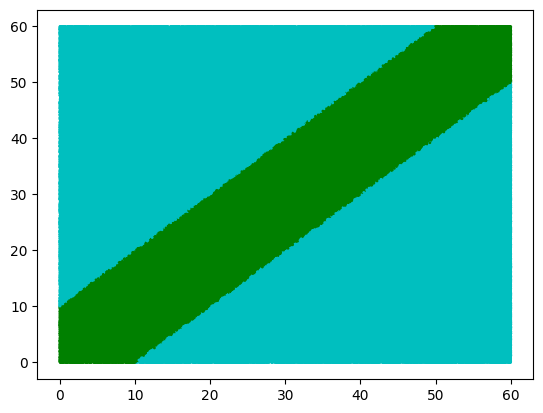

In [45]:
# Vamos a generar 100,000 simulaciones
muestra = 1000000

# Generamos los tiempos aleatorios entre [0,60]
# x : tiempo de llegada de Romero [0,60]
# y : tiempo de llegada de Romero [0,60]

x,y = np.random.uniform(0,60,muestra), np.random.uniform(0,60,muestra)

# Vamos a añadir nuestra condición de encuentro 
encuentro = np.where(abs(x-y)<=10, 'g', 'c') # r si se encuentran y b si no se encuentran

# Calculo de la probabilidad del encuentro
k=0
for elemento in encuentro:
    if elemento == 'g':
        k += 1

print("La probabilidad del evento A es: {}.".format(k/muestra))

plt.scatter(x,y,c=encuentro,s=1)
plt.show()

### Ejercicio

Un punto se elige al azar en un segmento de longitud 10.
¿Cuál es la probabilidad de que el punto caiga en un subsegmento de longitud 3?

 
$$ \mathbb{P} = \frac{Longitud favorable  }{Longitud total } = \frac{3  }{10 } = 0.3 $$

In [46]:
# Longitud total del segmento
longitud_total = 10

# Longitud del subsegmento favorable
longitud_favorable = 3

# Probabilidad geométrica
probabilidad = longitud_favorable / longitud_total

print(f"La probabilidad de que el punto caiga en el subsegmento es: {probabilidad:.2f}")


La probabilidad de que el punto caiga en el subsegmento es: 0.30


La aguja de Buffon

Imagina un piso con líneas paralelas separadas por una distancia 𝑑 y lanzamos una aguja de longitud 𝑙, con  𝑙 ≤ 𝑑, al azar sobre ese piso.

¿Cuál es la probabilidad de que la aguja cruce una línea?

Cuando la longitud de la aguja 𝑙≤𝑑, la probabilidad de cruce es:

$$ \mathbb{P} =  \frac {2𝑙 }{\pi d} $$

Podemos usar esta fórmula para estimar π si repetimos el experimento muchas veces:

$$ \pi  \approx \frac {2𝑙\cdot N }{d \cdot Ne} $$

donde:

N: número total de lanzamientos,

Ne: número de veces que la aguja cruza una línea.

In [47]:
# Parámetros del experimento
l = 1.0     # longitud de la aguja
d = 2.0     # distancia entre líneas (mayor que l)
N = 100000  # número de lanzamientos

# Contador de cruces
cruces = 0

for _ in range(N):
    # Posición del centro de la aguja (distancia desde una línea)
    y = random.uniform(0, d / 2)
    
    # Ángulo aleatorio entre 0 y pi/2 (debido a simetría)
    theta = random.uniform(0, math.pi / 2)
    
    # La aguja cruza una línea si la proyección vertical de la mitad de la aguja supera la distancia al borde
    if (l / 2) * math.sin(theta) >= y:
        cruces += 1

# Estimar pi usando la fórmula de Buffon
if cruces > 0:
    pi_estimado = (2 * l * N) / (d * cruces)
    print(f"Estimación de π usando el experimento de Buffon: {pi_estimado:.5f}")
else:
    print("No hubo cruces. Aumenta el número de lanzamientos.")


Estimación de π usando el experimento de Buffon: 3.12911


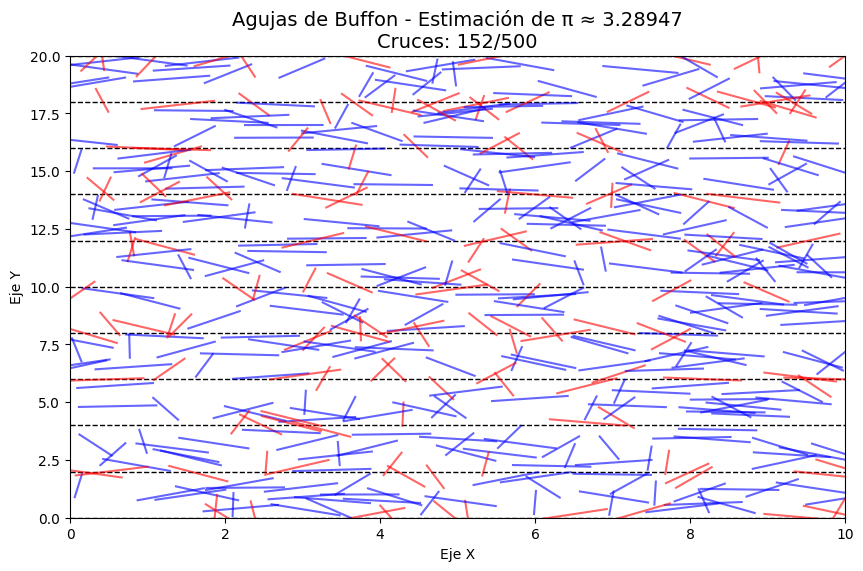

In [48]:

# Parámetros
l = 1.0     # longitud de la aguja
d = 2.0     # distancia entre líneas
N = 500     # número de agujas a lanzar (para visualización)
num_lines = 10  # número de líneas paralelas a mostrar

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar líneas paralelas
for i in range(num_lines + 1):
    ax.axhline(i * d, color='black', linewidth=1, linestyle='--')

# Contador de cruces
cruces = 0

# Lanzar agujas
for _ in range(N):
    # Centro aleatorio de la aguja (x, y)
    x_center = random.uniform(0, 10)
    y_center = random.uniform(0, num_lines * d)

    # Ángulo aleatorio entre 0 y pi
    theta = random.uniform(0, math.pi)

    # Extremos de la aguja
    x1 = x_center - (l / 2) * math.cos(theta)
    x2 = x_center + (l / 2) * math.cos(theta)
    y1 = y_center - (l / 2) * math.sin(theta)
    y2 = y_center + (l / 2) * math.sin(theta)

    # ¿Cruzó una línea?
    y_linea_abajo = math.floor(y_center / d) * d
    y_linea_arriba = y_linea_abajo + d

    cruza = (y1 <= y_linea_abajo) or (y2 >= y_linea_arriba)

    # Dibujar la aguja
    color = 'red' if cruza else 'blue'
    ax.plot([x1, x2], [y1, y2], color=color, alpha=0.6)

    if cruza:
        cruces += 1

# Estimación de π
if cruces > 0:
    pi_estimado = (2 * l * N) / (d * cruces)
    plt.title(f"Agujas de Buffon - Estimación de π ≈ {pi_estimado:.5f}\nCruces: {cruces}/{N}", fontsize=14)
else:
    plt.title("No hubo cruces - aumenta N", fontsize=14)

# Ajustes del gráfico
ax.set_xlim(0, 10)
ax.set_ylim(0, num_lines * d)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
plt.grid(False)
plt.show()


# 3.1 Frecuentista

Tenemos la hipótesis de que el espacio muestral es un conjunto finito, y podemos definir la probabilidad asociada a un evento $A$:

$$ f_n(A) = \frac{n(A)}{n}, $$
donde $n(A)$ denota al número de veces que ocurre $A$, y $n$ es el número de veces en que se realiza el experimento.

 Suponga que se realizan n repeticiones de un cierto experimento aleatorio y que se registra el número de veces que ocurre un determinado evento
 A. Esta información puede ser usada de la siguiente forma para definir la probabilidad de A

 En este caso,debemos hacer notar que no es humanamente posible llevar acabo una infinidad de veces el experimento aleatorio y tampoco podemos
 garantizar,porahora, laexistenciadetal límite.No es posible encontrar demanera exacta la probabilidad de un evento cualquiera,aunque permite tener 
 una proximación empírica del valor de $ \mathbb{P}(A) $, es decir:
 $$ \mathbb{P}(A) \approx \frac {nA} {n}$$


### Ejemplos

In [49]:
def volado(p):
    return 'sol' if random.random() < p else 'aguila'

In [50]:
volado(0.4)

'aguila'

In [51]:
a = [volado(0.4) for i in range(10)]
a

['aguila',
 'sol',
 'aguila',
 'aguila',
 'sol',
 'aguila',
 'sol',
 'sol',
 'sol',
 'aguila']

In [52]:
a.count("sol")

5

In [53]:
resultados = [] # lista vacia

In [54]:
for i in range(10):
    resultado = volado(0.4)
    resultados.append(resultado)
resultados

['aguila',
 'sol',
 'sol',
 'aguila',
 'aguila',
 'sol',
 'aguila',
 'sol',
 'aguila',
 'aguila']

In [55]:
# Vamos a simular nuestra probabilidad frecuentista
p = [] #Lista para almacernar las probabilidades

for i in range(1000): #Simula 1000 experimentos
    N = 1000 # numero de lanzamientos 
    resultados = []

    for i in range(N):
        resultado = volado(0.63)
        resultados.append(resultado)

    n_soles = resultados.count("sol") # cuenta en número de soles
    p_soles = n_soles / N #calcula la proporción

    p.append(p_soles)

# Probabilidad promedio
p_soles_prom = sum(p) / 1000 

print("Probabiliad {:.3f}".format(p_soles_prom))  

Probabiliad 0.630


El problema de Monty Hall
Es un famoso dilema de probabilidad basado en un concurso de televisión, y es un gran ejemplo de cómo las intuiciones humanas pueden ser engañosas en contextos probabilísticos.

Planteamiento del problema:
Tienes tres puertas enfrente de ti. Detrás de una de ellas hay un coche (el premio), y detrás de las otras dos hay cabras (premios no deseados).

Tu elección inicial: Eliges una puerta, pero no la abres aún.

Monty Hall (el presentador, que sabe qué hay detrás de cada puerta) abre una de las otras dos puertas, revelando una cabra.

Segunda oportunidad: Ahora Monty te da la opción de cambiar de puerta (de tu elección original a la otra puerta que queda cerrada) o quedarte con tu elección inicial.

¿Qué deberías hacer? ¿Cambiar de puerta o quedarte con tu elección original?

Respuesta correcta: Deberías cambiar de puerta.
Explicación: Inicialmente, al elegir una puerta, tienes una probabilidad de 
 de haber elegido el coche y una probabilidad de 
 de haber elegido una cabra.
Cuando Monty abre una puerta revelando una cabra, no cambia estas probabilidades. Al principio tenías un 2/3 de probabilidades de haber elegido mal, y Monty, al mostrar una cabra, te está ayudando a confirmar que el coche probablemente está detrás de la otra puerta.

Si elegiste mal inicialmente (lo cual sucede en el 66.67% de los casos), Monty te da la oportunidad de corregir tu elección cambiando a la puerta correcta.

Si elegiste correctamente desde el principio (probabilidad del 33.33%), entonces cambiar haría que perdieras.

Por lo tanto, cambiar de puerta te da una probabilidad de ganar de 
, mientras que quedarte con tu elección original te deja con solo una probabilidad de ganar de 
.

Ejemplo:

Puertas: [1, 2, 3]
El coche está detrás de la puerta 2.
Si eliges la puerta 1 (probabilidad 
), Monty abre la puerta 3, que tiene una cabra.
Si cambias a la puerta 2, ganas el coche (probabilidad 
).

Implementación en Python
El siguiente código simula el famoso problema de Monty Hall en tres escenarios distintos:

Mantener la elección inicial (no cambiar de puerta).
Cambiar siempre de puerta.
Elegir de manera aleatoria entre mantener o cambiar.

1.- Generar el juego
La función generate_game(n) crea un conjunto de juegos. Cada juego tiene 3 puertas, una de ellas con un premio (el coche) y las otras dos con una cabra.

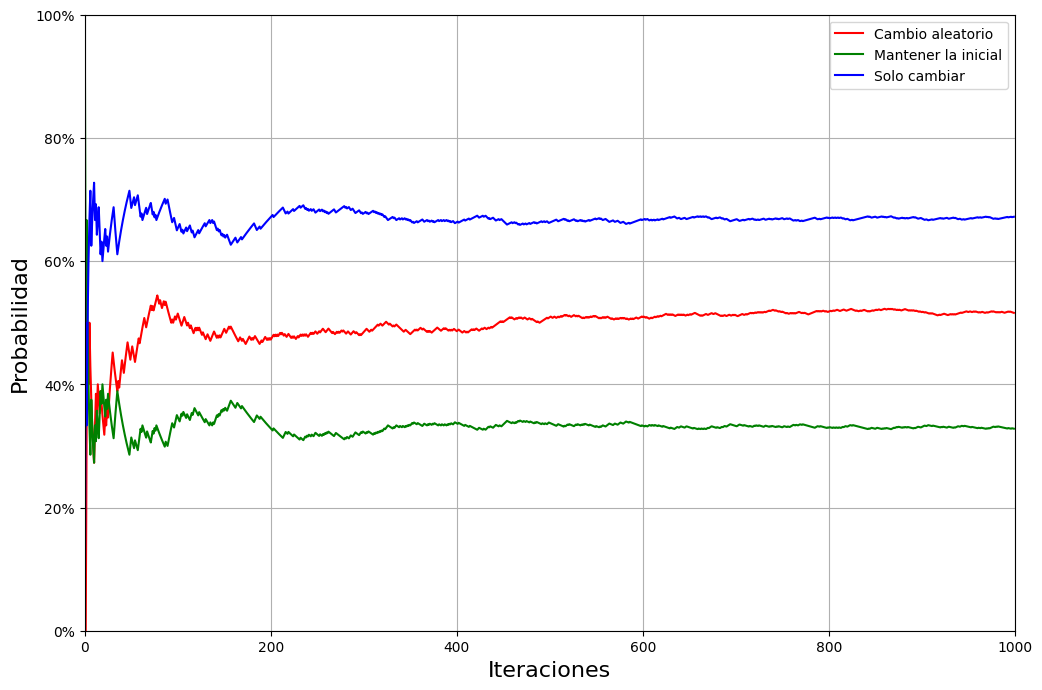

In [56]:

# Esta función generará rondas aleatorias para nuestro juego. Cada ronda consta de 3 puertas. Solo una de las puertas es correcta, las otras dos son incorrectas.
# Esta función genera un conjunto de n juegos, cada uno con tres puertas, y solo una contiene el coche.

def generate_game(n: int):
    game = []

    for _ in range(n):
        doors = [False] * 3 # Inicializa 3 puertas como "falsas", indicando que no tienen el premio.
        winner = randint(0, 2) # Escoge aleatoriamente cuál puerta tiene el coche (premio).
        doors[winner] = True  # La puerta seleccionada se marca como True (es la puerta ganadora).
        game.append(doors) # Añade este set de puertas al juego.

    return game


# Esta es una función auxiliar que toma una lista de 3 puertas, examina la segunda y la tercera puerta y luego abre la que tiene una cabra (es decir, la puerta equivocada).
#Esto simula un host con conocimiento de lo que hay detrás de las puertas.
def reveal_goat(doors):
    # Get from doors 2 and 3 the one which contains goat.
    for i in range(1, 3): # Revisa solo las puertas 2 y 3, porque la puerta 1 es la que elige inicialmente el jugador.
        if doors[i] == False: # Si la puerta no contiene el coche.
            return i  # Devuelve el índice de la puerta con cabra.


# ***Simular una elección aleatoria**
#
# Simular una situación en la que el jugador elige aleatoriamente si desea mantener su elección inicial o cambiarla.

def simulate_random_choice(game: list): #El jugador decide al azar si cambia o no después de que Monty revele una cabra.
    wins = 0
    attempts = 0

    history = []

    for doors in game:
        attempts += 1

        #Monty revela una cabra.
        goat = reveal_goat(doors)

        # El jugador decide aleatoriamente si cambiar o no.
        new_choice = randint(0, 1)
        final_choice = 0 if new_choice == 0 else 2 if goat == 1 else 1 # Calcula la nueva elección

        if (doors[final_choice] == True): #Si la elección es correcta, suma un win
            wins += 1

        history.append(wins / attempts) # Añade el ratio de victorias hasta el momento.

    return wins, history


# **Simular elección inicial**
#
# Simular una situación en la que el jugador *solo* conserva su elección inicial y nunca cambia

def simulate_keep_choice(game: list): #El jugador nunca cambia de puerta.
    wins = 0
    attempts = 0
    history = []

    for doors in game:
        attempts += 1

        # User does not switch game.
        if (doors[0] == True):  # Si la primera puerta (la inicial) tiene el coche, suma un win.
            wins += 1

        history.append(wins / attempts)  # Registra el ratio de victorias.

    return wins, history


# **Simular elección de cambio**
#
# Simular una situación en la que el jugador cambia su elección cada vez.

# El jugador cambia de puerta siempre después de que Monty revele una cabra.

def simulate_switch_choice(game: list):
    wins = 0
    attempts = 0
    history = []

    for doors in game:
        attempts += 1

        # Monty revela una cabra.
        goat = reveal_goat(doors)

        # Player switches his doors (here he chooses the non-opened doors).
        new_choice = 1 if goat == 2 else 2 # El jugador cambia a la otra puerta no abierta.

        if (doors[new_choice] == True): # Si la nueva elección es correcta, suma un win.
            wins += 1

        history.append(wins / attempts) # Registra el ratio de victorias.


    return wins, history


# Ahora comienza el cálculo, que genera $n$ juegos aleatorios para la simulación.

# El código genera un conjunto de 1000 juegos y ejecuta las tres simulaciones:
game = generate_game(1000)


# Ejecute las tres simulaciones definidas anteriormente para el juego generado.

wins_random, history_random = simulate_random_choice(game)
wins_keep, history_keep = simulate_keep_choice(game)
wins_switch, history_switch = simulate_switch_choice(game)


# Y por último, crea un gráfico para que podamos ver el resultado.
plt.figure(figsize=(12,8))
plt.plot(history_random, 'r', label="Cambio aleatorio")
plt.plot(history_keep, 'g', label="Mantener la inicial")
plt.plot(history_switch, 'b', label="Solo cambiar")
plt.legend(loc='upper right')
plt.ylim(0, 1.0)
plt.xlim(0, 1000)
plt.ylabel("Probabilidad", fontsize=16)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.xlabel("Iteraciones", fontsize=16)
plt.grid(True)
plt.show()

### Ejercicios

Las limitaciones mencionadas hacen que esta definición de probabilidad no sea enteramente formal,pero, tiene laventaja de que su forma de
 cálcul hace evidente la interpretación de la probabilidad como una medida de la frecuencia con la que ocurre un evento. 

Consideremos el experimento aleatorio de lanzar un dado equilibrado yr egistrar la ocurrencia del evento A,definido como el conjunto
 {2,4,6}.Se ha llevado a cabo este experimento y después de lanzar el dado 20 veces,se obtuvieron los siguientes resultados.
 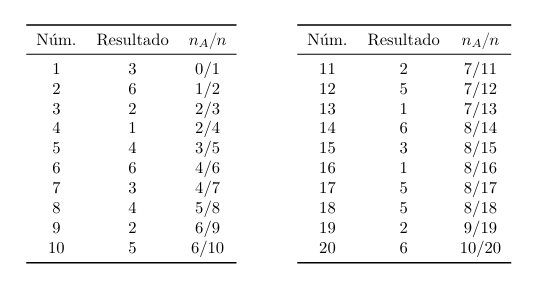
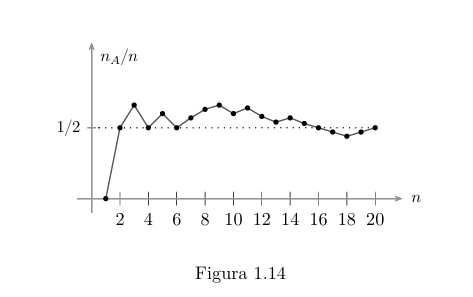

 Se muestra el singular comportamiento del cociente nA/n a lo largo del tiempo, al principio se pueden presentar algunas
 oscilaciones, pero eventualmente el cociente parece estabilizarse en un cierto valor. Realizando un mayor número de observaciones del experimento, no es
 difícil verificar que el cociente nA/n se estabiliza en 1/2 cuando el dado está equilibrado y el número de ensayos n es grande.

In [57]:
# Número de lanzamientos
N = 10000

# Contador de veces que sale un 6
seis = 0

# Simulación de lanzamientos
for _ in range(N):
    lanzamiento = random.randint(1, 6)
    if lanzamiento == 6:
        seis += 1

# Probabilidad frecuentista de obtener un 6
probabilidad_seis = seis / N

print(f"Número de lanzamientos: {N}")
print(f"Número de veces que salió 6: {seis}")
print(f"Probabilidad frecuentista de obtener un 6: {probabilidad_seis:.4f}")


Número de lanzamientos: 10000
Número de veces que salió 6: 1660
Probabilidad frecuentista de obtener un 6: 0.1660
